In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
df.shape

(1338, 7)

In [ ]:
# data checks to perform

# 1.check missing values
# 2. check duplicates
# 3. check data type
# 4. check number of unique values of each column
# 5. check statistics of data set.
# 6. check various categories present in the different categorical column.

In [ ]:
# 1. check missing values
df.isna().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [ ]:
# 2. check duplicates
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# 3. check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# 4. checking the number of unique values of each column
df.nunique()

,0
age,47
sex,2
bmi,275
children,6
smoker,2
region,4
expenses,1337


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
# exploring data
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [ ]:
num_features

['age', 'bmi', 'children', 'expenses']

In [ ]:
cat_features

['sex', 'smoker', 'region']

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


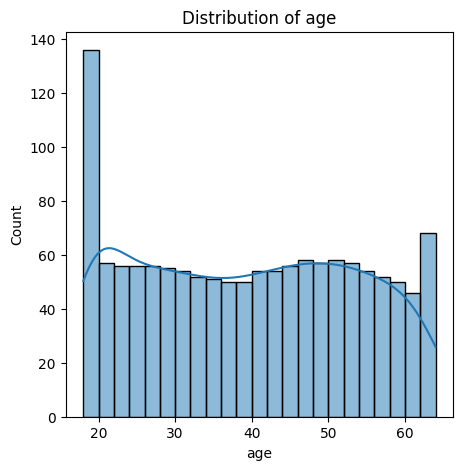

In [ ]:
# distribution of age
plt.figure(figsize=(5,5))
plt.title('Distribution of age')
sns.histplot(data=df, x='age', binwidth=2, kde=True)
# plt.xticks(rotation=60)
plt.show()

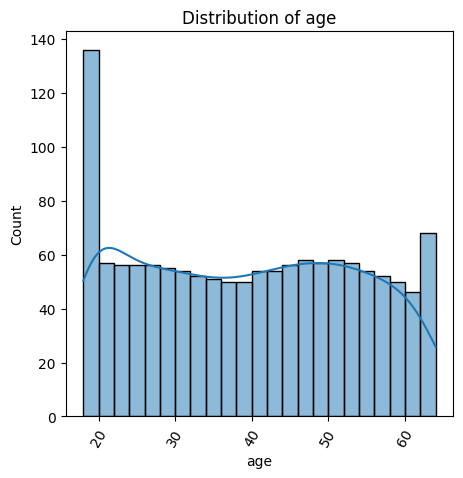

In [ ]:
# distribution of age
plt.figure(figsize=(5,5))
plt.title('Distribution of age')
sns.histplot(data=df, x='age', binwidth=2, kde=True)
plt.xticks(rotation=60)
plt.show()

<Axes: title={'center': 'children'}, ylabel='children'>

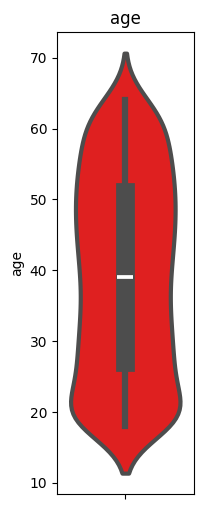

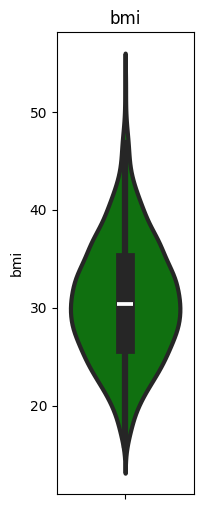

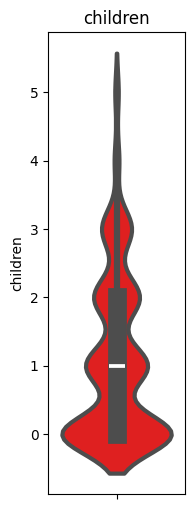

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(1,3,1)
plt.title('age')
sns.violinplot(y='age', data=df, color='red', linewidth=3)

plt.figure(figsize=(6,6))
plt.subplot(1,3,2)
plt.title('bmi')
sns.violinplot(y='bmi', data=df, color='green', linewidth=3)

plt.figure(figsize=(6,6))
plt.subplot(1,3,3)
plt.title('children')
sns.violinplot(y='children', data=df, color='red', linewidth=3)


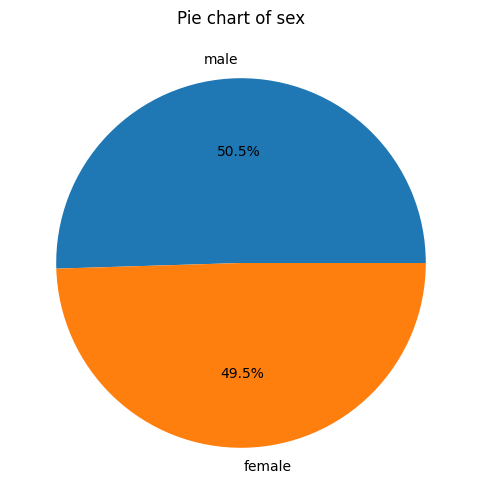

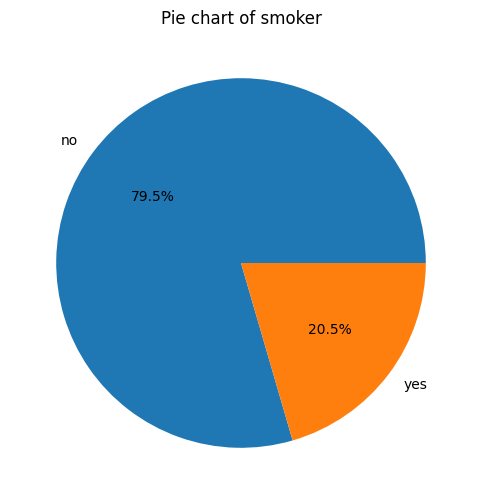

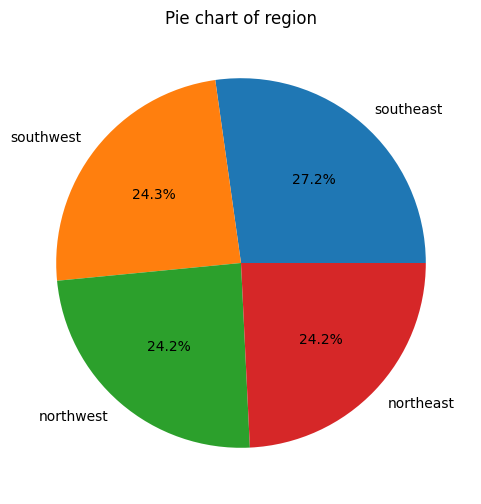

In [ ]:
for i, col in enumerate(cat_features):
  plt.figure(figsize=(6,6))
  plt.title(label = f'Pie chart of {col}')
  plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct = '%1.1f%%')
  plt.show()

Insights
1. Number of male and female students is almost equal.
2. There are only 20% people who smokes.
3. There are equal numbers of people in all regions.

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

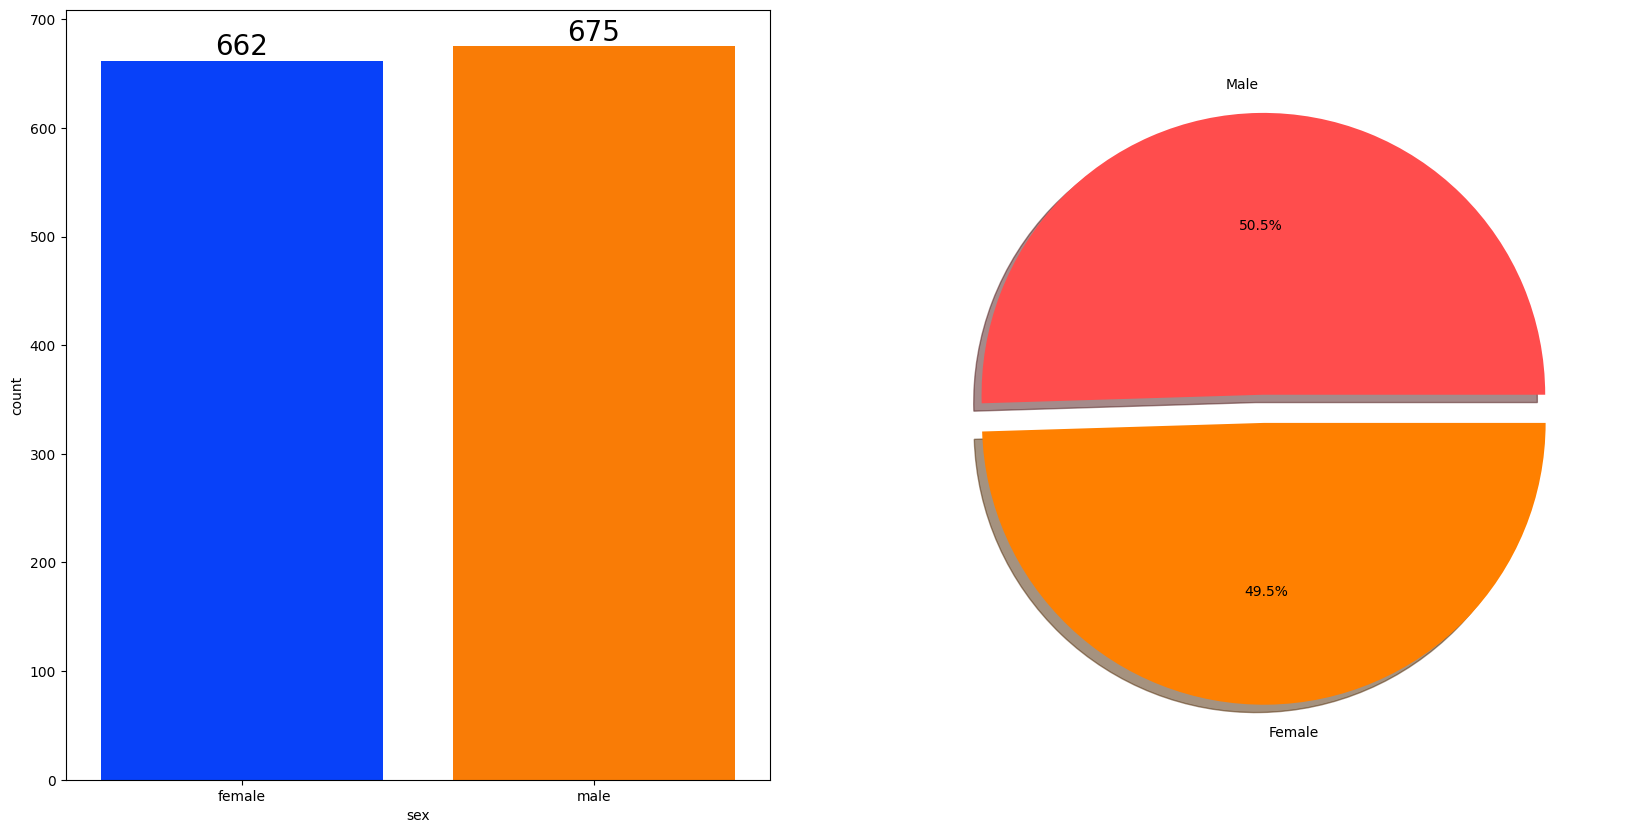

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights - Gender has balanced data with female are 662(49%) and male are 675(51%).

In [ ]:
# Bivariate analysis (is gender has any impact on student's performance)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
num_features

['age', 'bmi', 'children', 'expenses']

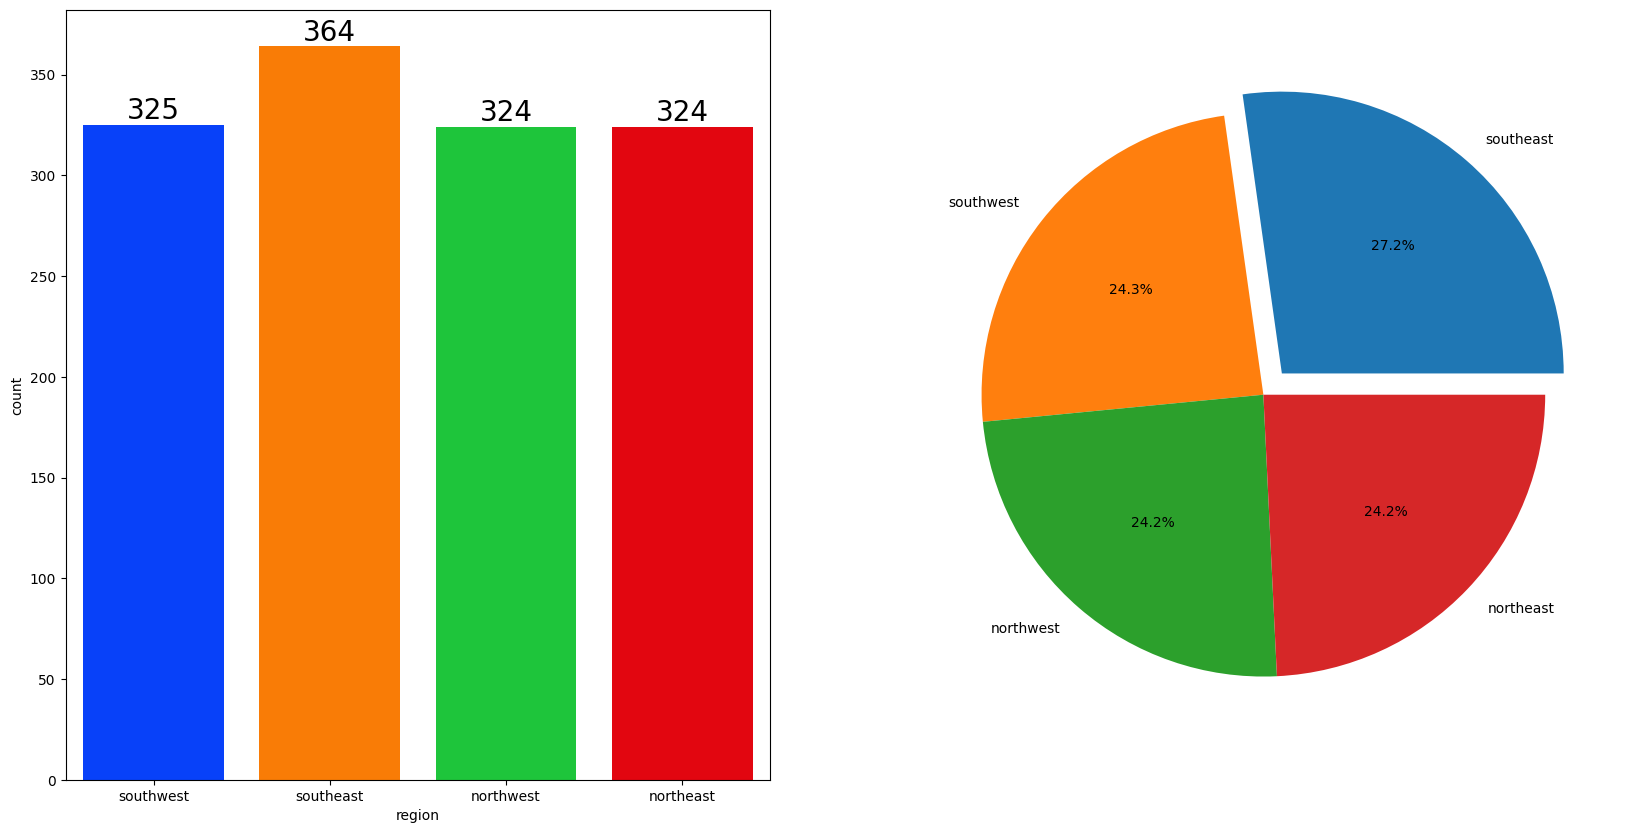

In [ ]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x = df['region'], data=df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
  ax[0].bar_label(container, color = 'black', size=20)

plt.pie(x=df['region'].value_counts(), labels=df['region'].value_counts().index, explode=[0.1 ,0,0,0], autopct='%1.1f%%')
plt.show()

In [ ]:
cat_features

['sex', 'smoker', 'region']

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
num_features

['age', 'bmi', 'children', 'expenses']

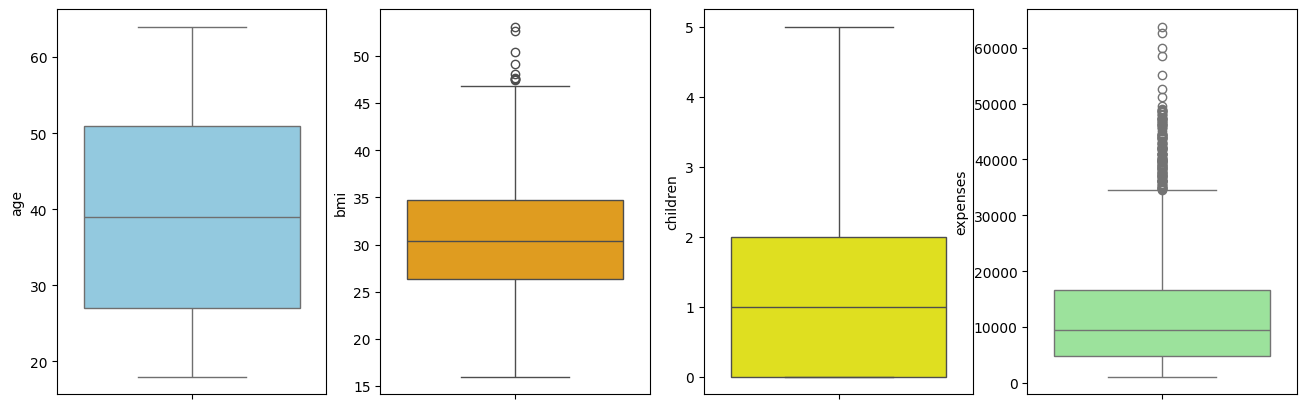

In [ ]:
plt.subplots(1,4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['age'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['bmi'], color = 'orange')
plt.subplot(143)
sns.boxplot(df['children'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['expenses'], color = 'lightgreen')
plt.show()

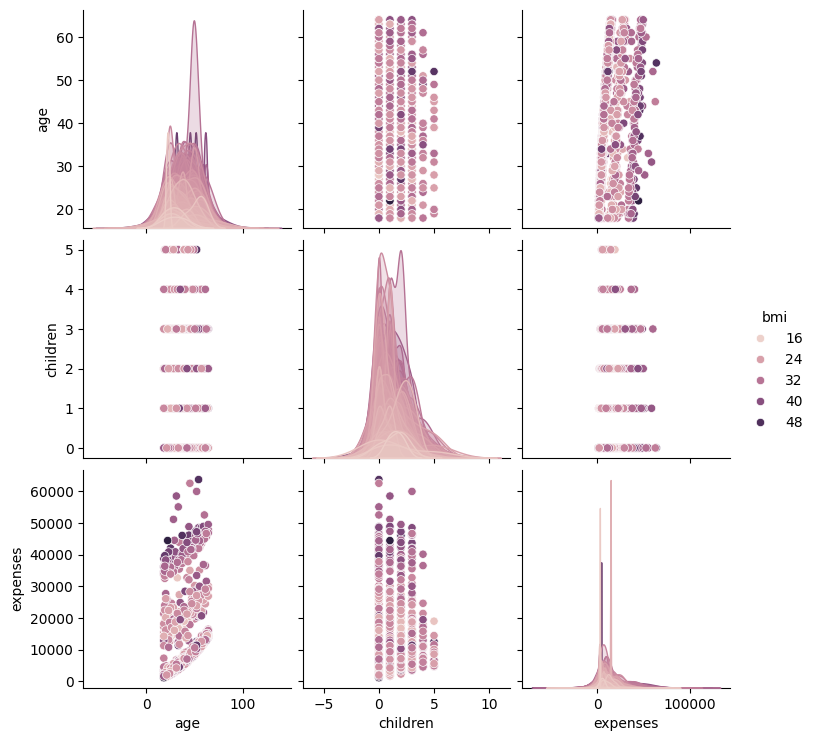

In [ ]:
sns.pairplot(df, hue='bmi')
plt.show()

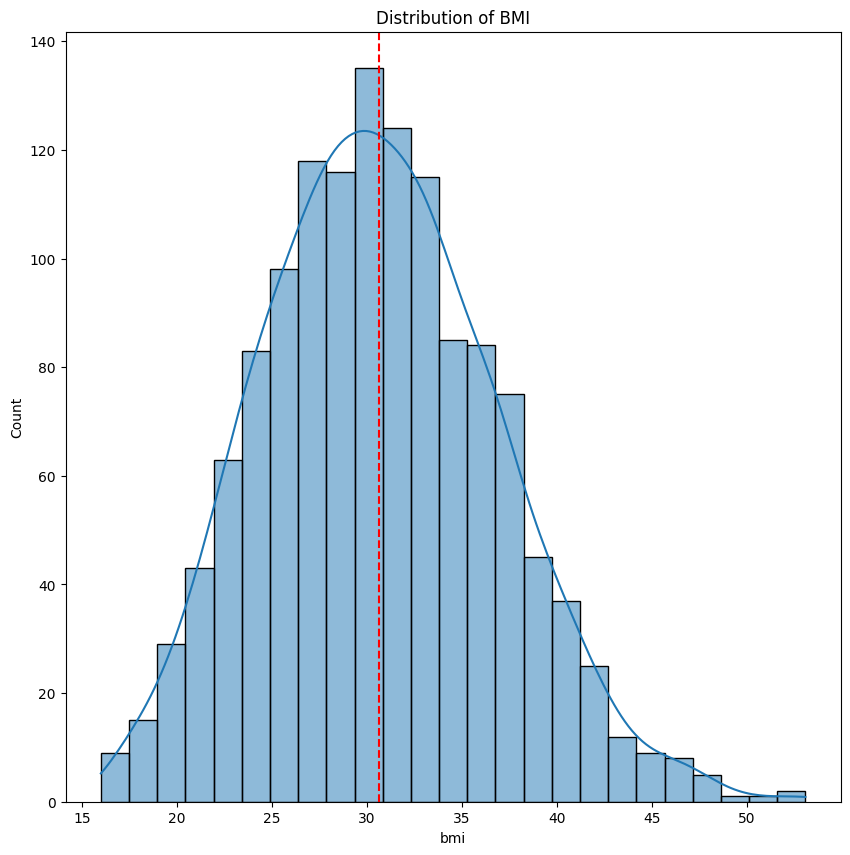

In [ ]:
# distribution of bmi

plt.figure(figsize=(10,10))
plt.title('Distribution of BMI')

sns.histplot(data=df, x = 'bmi', kde=True)
plt.axvline(x=df['bmi'].mean(), linestyle = '--', c='r')

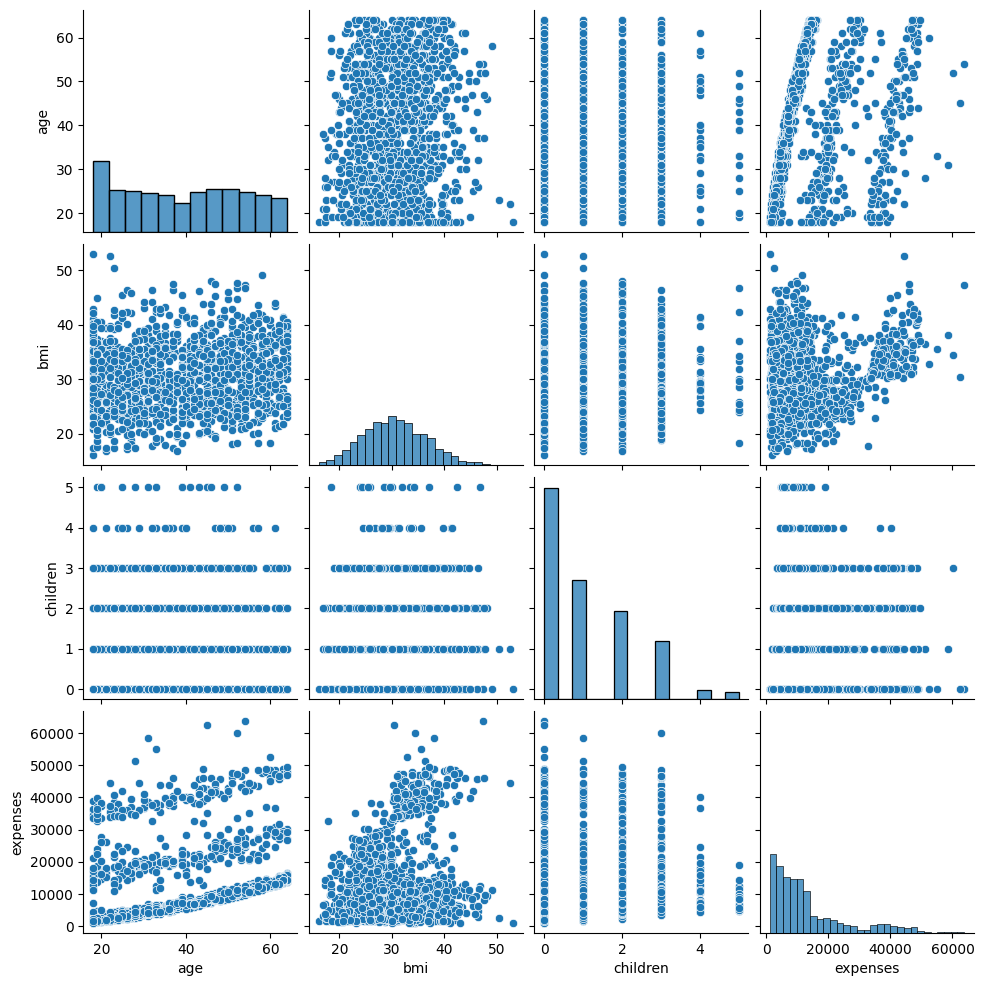

In [ ]:
sns.pairplot(df)

In [ ]:
# checking the relation between age, smoker and expenses
a1 = df.groupby(['age', 'sex', 'smoker'])['expenses'].mean()

In [ ]:
a1.head()

age  sex     smoker
18   female  no         3716.738966
             yes       26862.270000
     male    no         2695.672857
             yes       24779.461250
19   female  no         3879.903333
Name: expenses, dtype: float64

In [ ]:
df.groupby(['age', 'smoker'])['expenses'].mean().reset_index()

,age,smoker,expenses
0,18,no,3215.162632
1,18,yes,25473.730833
2,19,no,3575.430612
3,19,yes,27001.233333
4,20,no,3673.113000
...,...,...,...
89,62,yes,37084.607500
90,63,no,14205.336111
91,63,yes,40331.786000
92,64,no,15805.351333


In [ ]:
# Premium expenses as per the region

a5 = df.groupby(['region', 'age'])['expenses'].mean().reset_index()

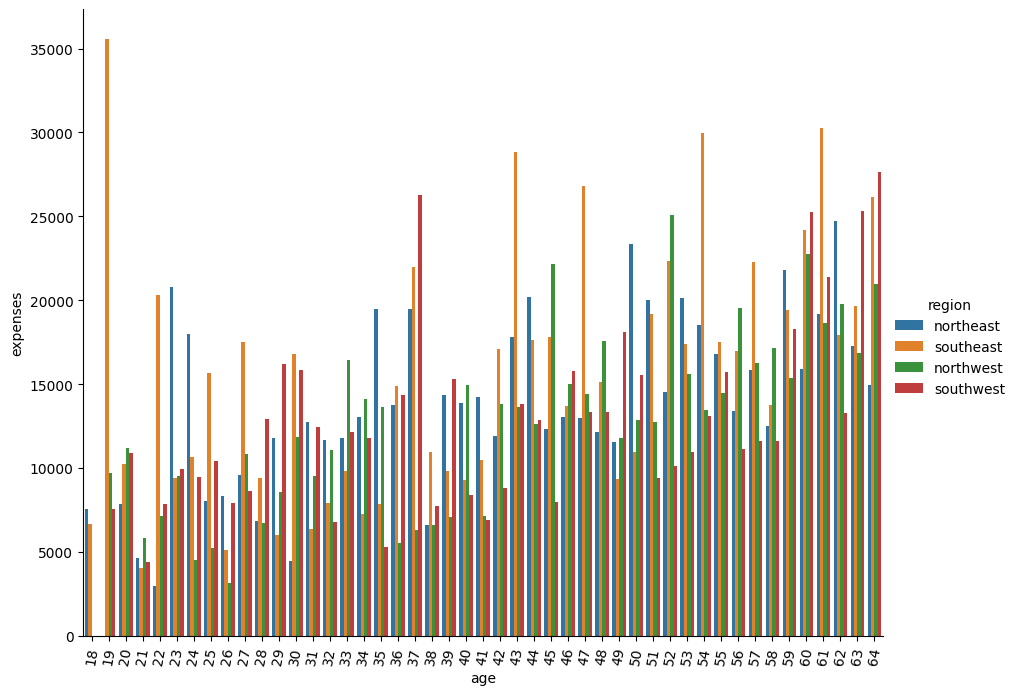

In [ ]:
g = sns.catplot(data=a5, x='age', y='expenses', hue='region', kind='bar', height=7, aspect=1.3)
for i in g.axes.flatten():
  for label in i.get_xticklabels():
    label.set_rotation(80)

In [ ]:
df.groupby(['smoker', 'region'])['expenses'].mean().sort_values(ascending=False)

smoker  region   
yes     southeast    34844.997253
        southwest    32269.064138
        northwest    30192.002759
        northeast    29673.536269
no      northeast     9165.531946
        northwest     8582.466955
        southeast     8032.216300
        southwest     8019.285019
Name: expenses, dtype: float64

In [ ]:
# To check how bmi is affecting the expenses

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


([<matplotlib.axis.YTick at 0x7986391a8340>,
 [Text(0, 0, '0'),
  Text(0, 3000, '3000'),
  Text(0, 6000, '6000'),
  Text(0, 9000, '9000'),
  Text(0, 12000, '12000'),
  Text(0, 15000, '15000'),
  Text(0, 18000, '18000'),
  Text(0, 21000, '21000'),
  Text(0, 24000, '24000'),
  Text(0, 27000, '27000'),
  Text(0, 30000, '30000'),
  Text(0, 33000, '33000'),
  Text(0, 36000, '36000'),
  Text(0, 39000, '39000'),
  Text(0, 42000, '42000'),
  Text(0, 45000, '45000'),
  Text(0, 48000, '48000'),
  Text(0, 51000, '51000'),
  Text(0, 54000, '54000'),
  Text(0, 57000, '57000'),
  Text(0, 60000, '60000'),
  Text(0, 63000, '63000')])

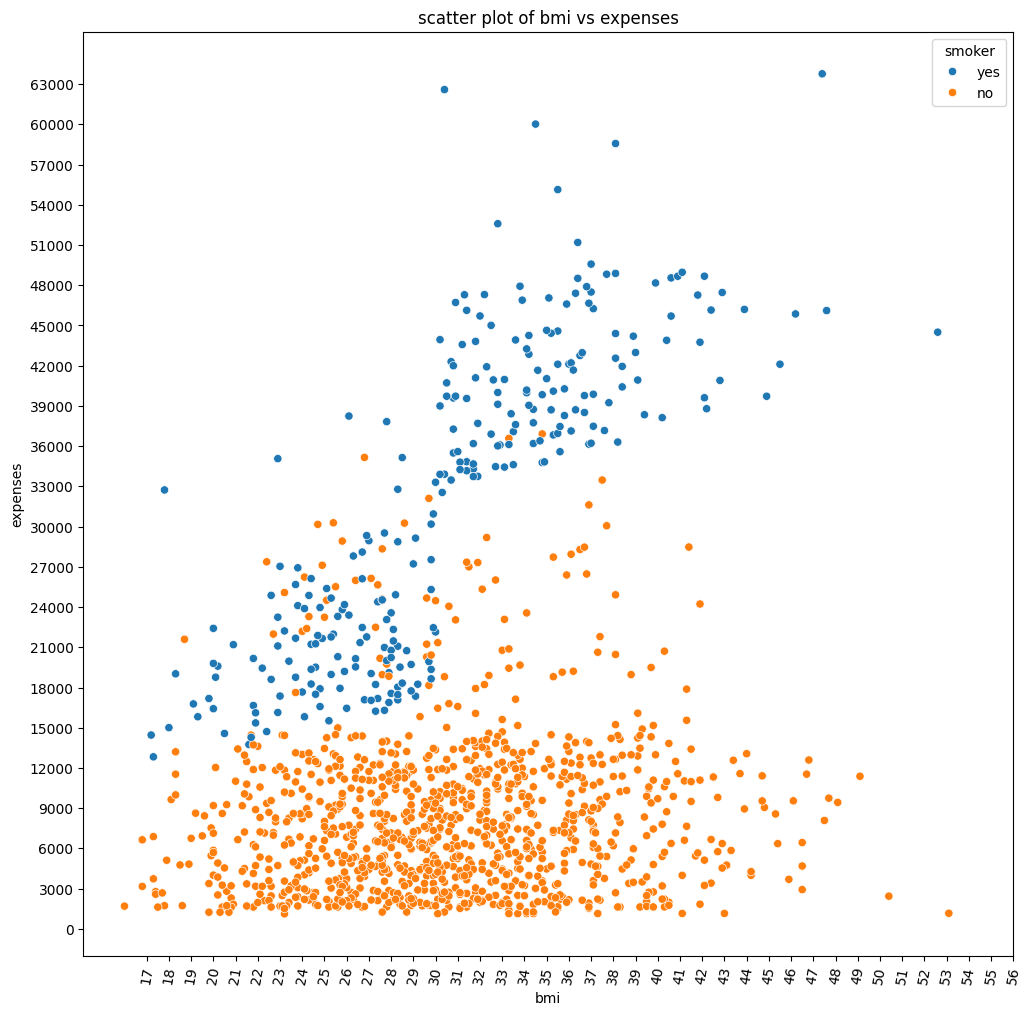

In [ ]:
plt.figure(figsize=(12,12))
plt.title('scatter plot of bmi vs expenses')
sns.scatterplot(data=df, x='bmi', y = 'expenses', hue='smoker')
plt.xticks(np.arange(17,57,1), rotation=80)
plt.yticks(np.arange(0, 64000, 3000))

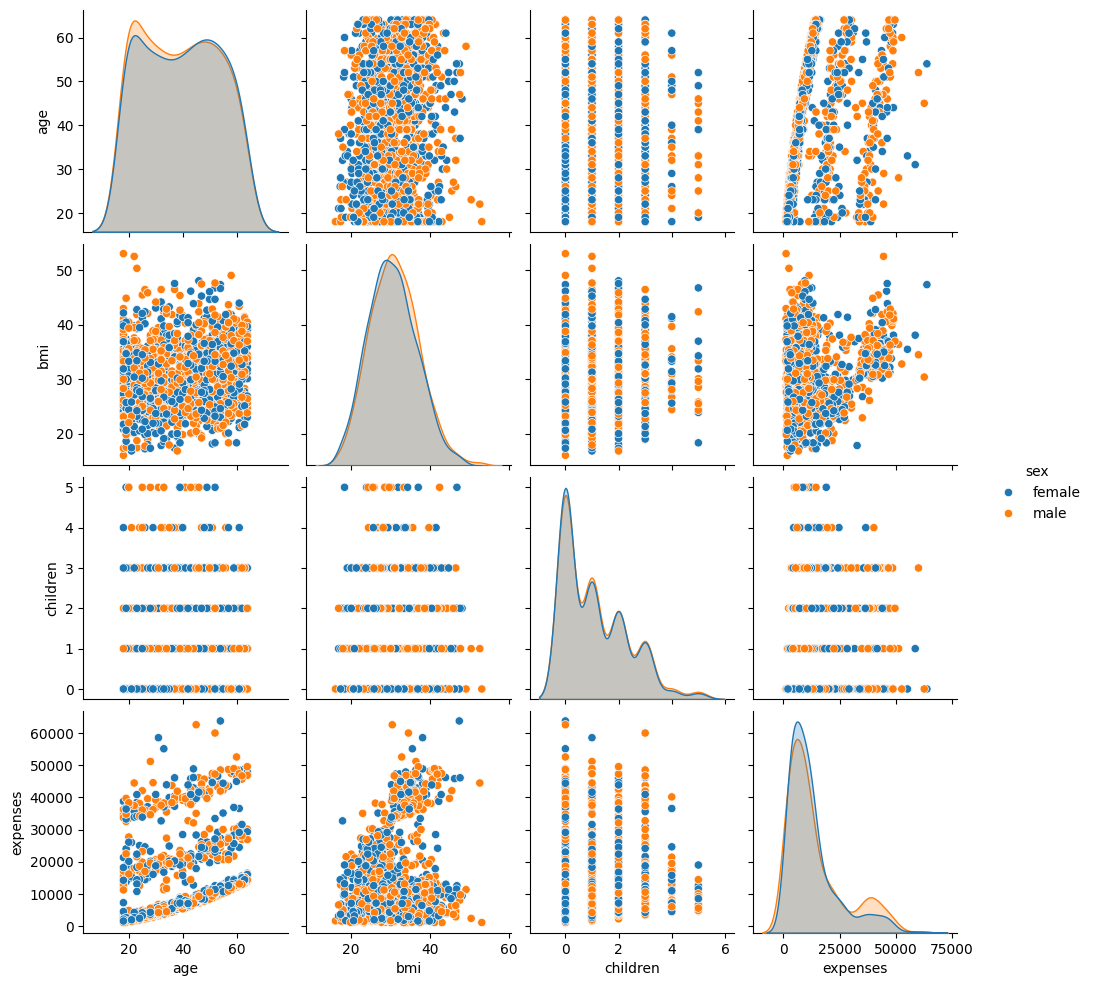

In [ ]:
sns.pairplot(df, hue='sex')

**From this EDA we can conclude that, the person who is a smoker is paying high premium.**

**Model Training**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# regression model = Linear, ridge, lasso, decisiontreeregressor, svr, randomforestregressor, adaboostregressor, xgbregressor,

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


import warnings

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['expenses'].values

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [ ]:
df['bmi']

,bmi
0,27.9
1,33.8
2,33.0
3,22.7
4,28.9
...,...
1333,31.0
1334,31.9
1335,36.9
1336,25.8


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
X= df.drop(columns = ['expenses'], axis=1)
y = df['expenses']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [ ]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [ ]:
cat_features = [feature for feature in X if df[feature].dtype == 'O']
cat_features

['sex', 'smoker', 'region']

In [ ]:
num_features =[feature for feature in X if df[feature].dtype != 'O']
num_features

['age', 'bmi', 'children']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region']),
                                ('StandardScaler', StandardScaler(),
                                 ['age', 'bmi', 'children'])])

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(1337, 11)

In [ ]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1069, 11), (268, 11))

In [ ]:
# creating an evaluate function to give all metrics after model training

def evaluate_model(true, predicted):
  mae  = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true,predicted)
  rmse =  np.sqrt(mse)
  r2_square = r2_score(true, predicted)
  return mae, rmse, r2_square

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'Support vector regression': SVR(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'Gradient': GradientBoostingRegressor(random_state=42)

}

In [ ]:
model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train, y_train)

  y_test_pred = model.predict(X_test)

  model_test_mae, model_test_rmse, model_test_r2  = evaluate_model(y_test, y_test_pred)
  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])


  print('model performance')
  print('root mean squared error: {:.4f}'.format(model_test_rmse))
  print('mean absolute error: {:.4f}'.format(model_test_mae))
  print('r2_score: {:.4f}'.format(model_test_r2))

  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
model performance
root mean squared error: 5815.2442
mean absolute error: 4025.4901
r2_score: 0.8160


Lasso
model performance
root mean squared error: 5957.8970
mean absolute error: 4178.0744
r2_score: 0.8068


Ridge
model performance
root mean squared error: 5964.5666
mean absolute error: 4185.6241
r2_score: 0.8064


Decision Tree
model performance
root mean squared error: 6029.3373
mean absolute error: 2739.8541
r2_score: 0.8022


Random Forest Regressor
model performance
root mean squared error: 4629.5990
mean absolute error: 2532.2955
r2_score: 0.8834


XGBRegressor
model performance
root mean squared error: 5039.4575
mean absolute error: 2965.3970
r2_score: 0.8618


Support vector regression
model performance
root mean squared error: 14425.2202
mean absolute error: 9260.1627
r2_score: -0.1324


AdaBoost Regressor
model performance
root mean squared error: 5130.0651
mean absolute error: 4125.1633
r2_score: 0.8568


Learning rate set to 0.041377
0:	learn: 11367.91

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)



,Model Name,R2_score
9,Gradient,0.896979
8,CatBoosting Regressor,0.885014
4,Random Forest Regressor,0.883361
5,XGBRegressor,0.861794
7,AdaBoost Regressor,0.856780
0,Linear Regression,0.815968
1,Lasso,0.806828
2,Ridge,0.806395
3,Decision Tree,0.802168
6,Support vector regression,-0.132409


In [ ]:
# Gradient Boosting
model = GradientBoostingRegressor()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)


Accuracy of the model is 89.78


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50,100, 150, 200],
              'learning_rate': [0.001, 0.1, 1, 1.5, 2, 2.5],
              'ccp_alpha': [1,2]}


In [ ]:
reg = GridSearchCV(reg, param_grid=param_grid, cv=5, verbose=3)
reg

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'ccp_alpha': [1, 2],
                         'learning_rate': [0.001, 0.1, 1, 1.5, 2, 2.5],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [ ]:
model = reg.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.078 total time=   0.1s
[CV 2/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.077 total time=   0.1s
[CV 3/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.079 total time=   0.1s
[CV 4/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.080 total time=   0.1s
[CV 5/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=50;, score=0.074 total time=   0.1s
[CV 1/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.150 total time=   0.1s
[CV 2/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.149 total time=   0.1s
[CV 3/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.152 total time=   0.1s
[CV 4/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, score=0.154 total time=   0.1s
[CV 5/5] END ccp_alpha=1, learning_rate=0.001, n_estimators=100;, scor

Text(0, 0.5, 'prediction')

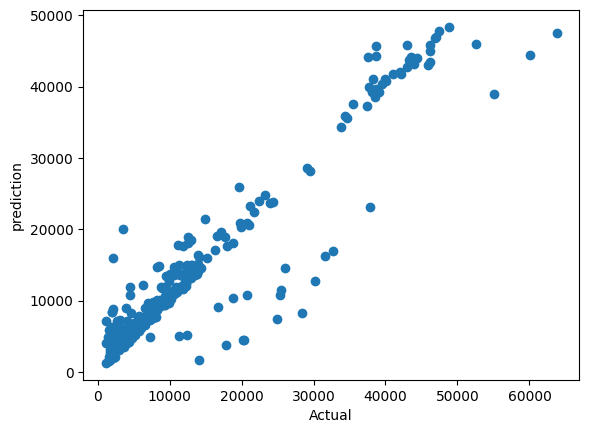

In [ ]:
# plot y_pred and y_test

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('prediction')

<Axes: xlabel='expenses'>

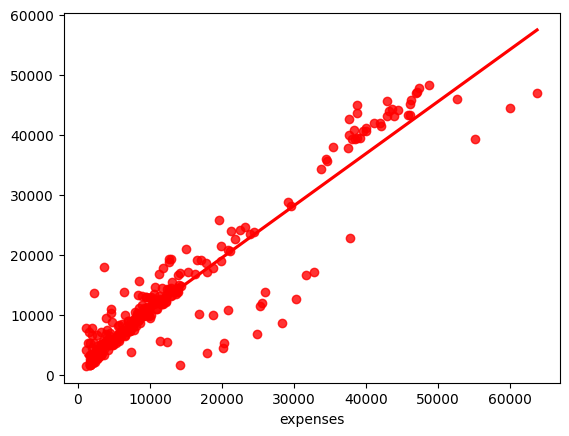

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [ ]:
# difference between actual and predicted values
pred_df = pd.DataFrame({'Actual Value': y_test, 'predicted_value': y_pred, 'difference': y_test-y_pred})
pred_df

,Actual Value,predicted_value,difference
900,8688.86,9826.5214,-1137.6614
1064,5708.87,7094.0608,-1385.1908
1256,11436.74,12149.3358,-712.5958
298,38746.36,43685.3412,-4938.9812
237,4463.21,6978.3054,-2515.0954
...,...,...,...
534,13831.12,14360.4830,-529.3630
542,13887.20,14490.6511,-603.4511
760,3925.76,9510.1580,-5584.3980
1284,47403.88,47844.6436,-440.7636
